# Features importances du modèle CatBoost sur 2 classes

### Imports

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.set_option('display.max_columns', None)
## Import des scripts python
import sys
import os
sys.path.append(os.path.abspath('../../python_scripts/'))

#import load_datas
import train_model as train
import save_model as saveModel
#import pickle_model

# Rechargement en cas de modification
import importlib
#importlib.reload(train)
#importlib.reload(saveModel)
#importlib.reload(pickle_model)

### Chargement des shap values + Summary plot

/home/flakai/Documents/MAR24_CDS_Accidents/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


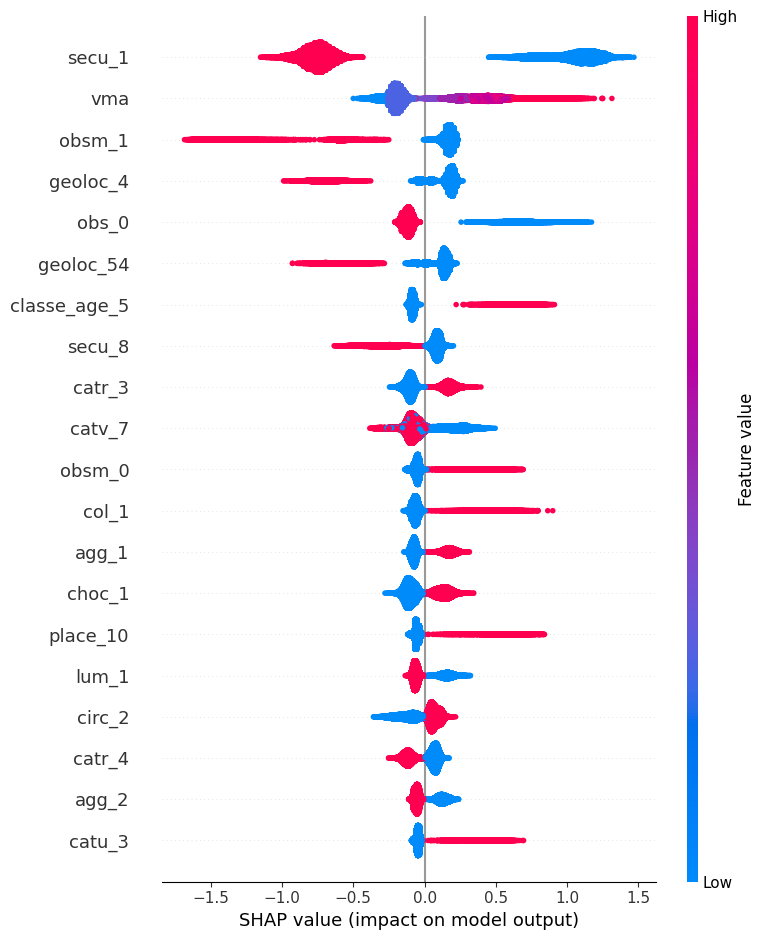

In [2]:
import shap

shap_df= pd.read_csv("shape_value_files/1_final_catboost_values_data_geo.zip", \
                      compression=dict(method='zip', archive_name='1_final_catboost_values_data_geo.csv'))

X_test = pd.read_csv("../../../../Data/X_test.zip", compression=dict(method='zip', archive_name='X_test.csv'))

shap_df= shap_df.drop(columns=['x_test_instance','base_values'])

shap_values_csv = shap_df.values

feature_names = shap_df.columns

shap_exp = shap.Explanation(values=shap_values_csv, data=X_test, feature_names=feature_names)

shap.summary_plot(shap_exp)


**Remarques :**

Les caractéristiques les plus importantes, par ordre d'importance, sont :
* **secu_1 (ceinture de sécurité)**
   > Selon le modèle, le risque de se faire tuer ou d'être bléssé hospitalisé est plus important sans ceinture de sécurité.

* **vma (vitesse maximales autorisée)**
  > Selon le modèle, plus la vitesse maximale autorisée est élevée, plus la probabilité d'être tué ou d'être bléssé hospitalisé est importante.

* **obsm_1 (obstacle mobile heurté)** 
  > Selon le modèle, si l'obstacle heurté est un piéton, le risque d'être tué est faible

* **geoloc_4 (Géolocalisation 4)** 
  > Selon le modèle, si la la géolocalisation 4 est abscente plus la probabilité d'être tué ou d'être bléssé hospitalisé est importante

* **obs_0 (Obstacle fixe sans objet)**
  > Selon le modèle, si l'obstacle fixe est sans objet alors le risque d'etre tué ou blessé hospitalise est faible

* **geoloc_54 (Géolocalisation 54)** 
  > Selon le modèle, si la la géolocalisation 54 est abscente plus la probabilité d'être tué ou d'être bléssé hospitalisé est importante

* **classe_age_5 (Classe d'âge +65 ans)** 
  > Selon le modèle, le risque d'être tué pour les +65 ans est important.


### Groupement des variables catégorielles

In [3]:
# Creer un dataframe avec les valeurs absolue des shap values
df_shap=pd.DataFrame(np.abs(shap_values_csv), columns=X_test.columns)

column_groups = {}

# Regroupement des colonnes
for col in X_test.columns:
    prefix = col.split('_')[0]  
    if prefix not in column_groups:
        column_groups[prefix] = []
    column_groups[prefix].append(col)

df_avg = pd.DataFrame()

# Calculer les moyennes pour chaque groupe de variable
for prefix, columns in column_groups.items():
    df_avg[f'{prefix}'] = df_shap[columns].mean(axis=1) 

# Afficher le DataFrame des moyennes des observations
display(df_avg.head(3))

,mois,lum,agg,int,atm,col,catr,circ,vosp,prof,plan,surf,infra,situ,catv,obs,obsm,choc,manv,motor,place,catu,trajet,hh,classe,geoloc,nbv,vma,sexe,secu,weekend
0,0.010958,0.017921,0.060139,0.013422,0.001318,0.015482,0.037314,0.060791,0.013028,0.004191,0.002957,0.001848,0.001923,0.001867,0.017682,0.007402,0.041442,0.020248,0.003145,0.002537,0.009266,0.027722,0.019474,0.003347,0.045291,0.008719,0.032709,0.318627,0.022894,0.153440,0.014502
1,0.002081,0.012425,0.164083,0.011109,0.001641,0.092253,0.036217,0.037436,0.003727,0.010274,0.016767,0.001282,0.000659,0.003834,0.004889,0.005762,0.044299,0.030328,0.029411,0.000816,0.008189,0.020864,0.035040,0.004102,0.030040,0.004421,0.049927,0.504483,0.045020,0.087877,0.049365
2,0.001741,0.077142,0.065925,0.008629,0.001441,0.031069,0.031302,0.027153,0.012368,0.003184,0.001965,0.000646,0.001128,0.004480,0.004106,0.009098,0.049676,0.031492,0.005484,0.001038,0.014294,0.039709,0.027967,0.004146,0.023992,0.008424,0.005526,0.383639,0.016126,0.104068,0.043505


### Global Feauture Importance

,vma,secu,agg,obsm,nbv,catu,classe,col,circ,sexe,catr,lum,choc,weekend,place,trajet,obs,catv,situ,manv,geoloc,int,plan,hh,prof,vosp,mois,infra,motor,atm,surf
0,0.296199,0.118934,0.098138,0.068292,0.062034,0.055936,0.048012,0.04519,0.038267,0.037875,0.032366,0.025168,0.024951,0.021367,0.019509,0.015771,0.014237,0.009405,0.009335,0.008109,0.007839,0.006875,0.005942,0.005497,0.00497,0.00479,0.003498,0.003096,0.002981,0.002527,0.002287


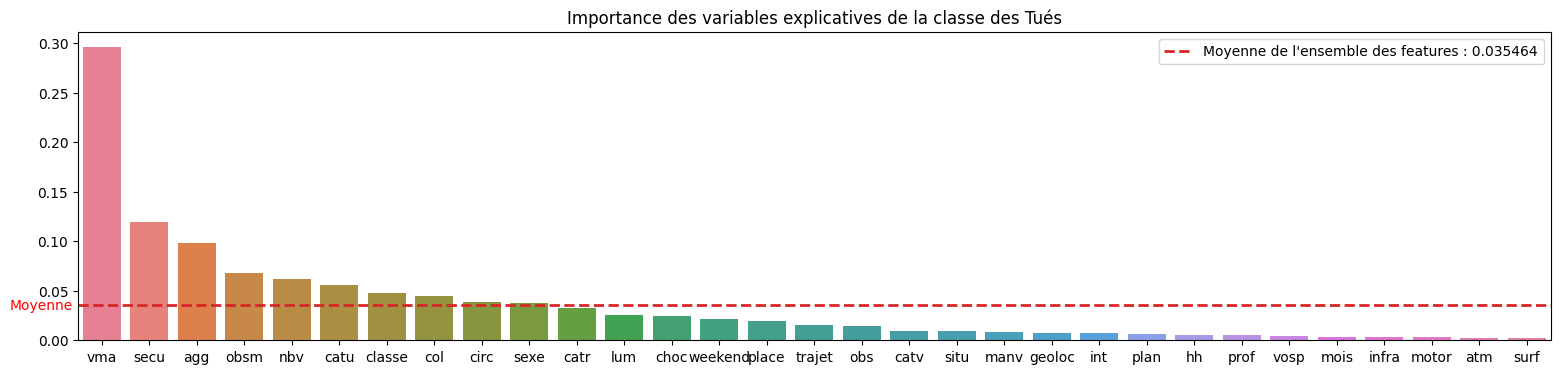

In [4]:

### Moyenne des shap values par variable
df_final_var_mean=pd.DataFrame(df_avg.mean().sort_values(ascending=False)).T

display(df_final_var_mean)

plt.figure(figsize=(19, 4))

# Bar plot de l'importance des variables explicatives
sns.barplot(df_final_var_mean)

# La moyenne total des features
cat_moy=df_avg.mean().mean()
plt.axhline(y=cat_moy, color=plt.cm.tab10(3), linestyle='--', linewidth=2, label=f"Moyenne de l'ensemble des features : {cat_moy:.6f}")
plt.text(-0.6, cat_moy, "Moyenne", color='r', va='center', ha='right')


plt.legend()
plt.title("Importance des variables explicatives de la classe des Tués")
plt.show()

**Remarques:**
>* Les features au dessus de la moyenne dans l'ordre d'importance sont les suivants : **vma,secu,agg,obsm,nbv,catu,classe_age,col**
>* La vitesse est la caractéristique la plus importante, qui domine largement
>* Enfin, les variables explicatives les plus importantes correspondent quasiment aux campagnes de sensibilisation routière, à savoir la vitesse, les équipements de sécurité, l'âge, etc.

### Fonction d'importance d'une variable

In [5]:

def feature_summary_plot(var_name:str):
    
    mois_columns_with_index = [(index, col) for index, col in enumerate(shap_df.columns) if col.startswith(var_name)]
    
    index_min=min(mois_columns_with_index)[0]
    index_max=max(mois_columns_with_index)[0]
    
    shap.summary_plot(shap_values_csv[:,index_min:index_max+1], X_test.iloc[:, index_min:index_max+1])


### Fonction Summary Plot des variables d'une variable catégorielle

In [6]:

df_shap_var_cat = pd.DataFrame(df_shap.mean().sort_values(ascending=False)).T

def show_categoriel_bar_plot(col_name:str,plot_size=(5,5)):
    #print(f"***** Annalyse des shap values de la variables {col_name} *****")
    for prefix, columns in column_groups.items():
        if prefix==col_name: 
            var_plot = list()
            for c in df_shap_var_cat.columns:                
                if c.startswith(prefix):
                    var_plot.append(c)

            #Plot
            plt.figure(figsize=plot_size)
            ax=sns.barplot(df_shap_var_cat[var_plot])

            #Ligne de la moyenne
            cat_moy=df_shap_var_cat[var_plot].mean().mean()
            #plt.axhline(y=cat_moy, color=plt.cm.tab10(3), linestyle='--', linewidth=2, label='Moyenne')
            plt.axhline(y=cat_moy, color=plt.cm.tab10(3), linestyle='--', linewidth=2, label=f"Moyenne : {cat_moy:.6f}")
            plt.text(-0.6, cat_moy, "Moyenne", color='r', va='center', ha='right')

            #Titre
            plt.title(f"Bar plot shap value de la variable {col_name}")

            plt.legend()
            plt.show()


## Annalyse des 7 features les plus imporatantes : vma,secu,agg,obsm,nbv,catu,classe_age,col

### Importance la feature **vma** (Vistesse maximale autorisée)

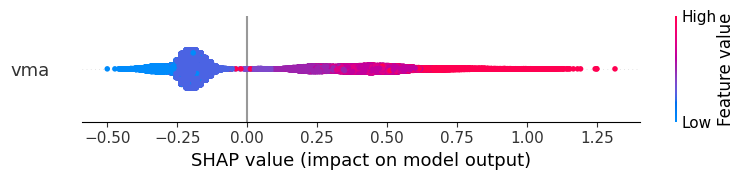

In [7]:
feature_summary_plot("vma")

**Remarques:**
>* vma est la feature la importante de notre model
>* Plus la vitesse maximale autorisé est grande plus on a la chance d'etre tué ou hospitalisé ( la couleur rouge est plus vive)

### Importance de la feature **secu** (Présence et utlisation d'un équipement de sécurité)

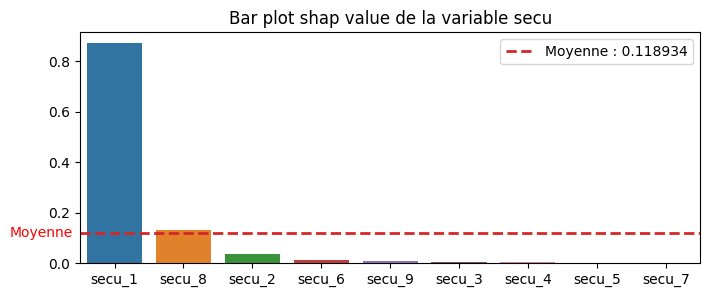

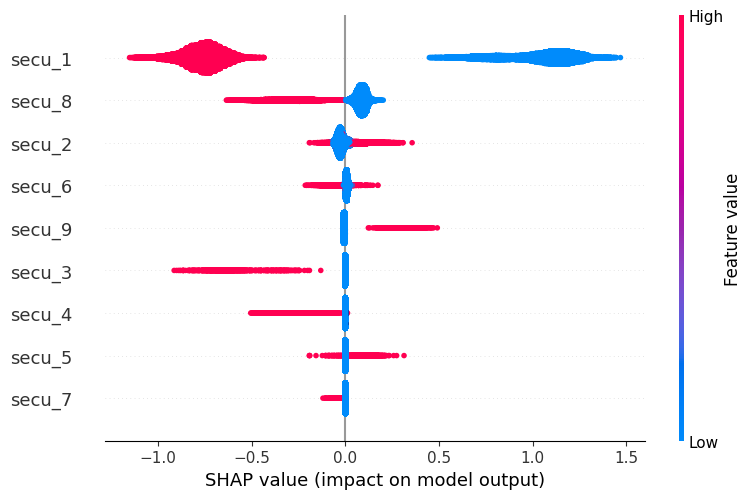

In [8]:
show_categoriel_bar_plot('secu',plot_size=(8,3))
feature_summary_plot("secu")

**Remarques:**
>* La présence du port de la ceinture de sécurité (secu_1) est la variable la plus dominante de la feature
>* Selon le modèle, l'absence du port de la ceinture augmente le risque d'être tué.


### Importance de la feature **agg** (Agglomération)

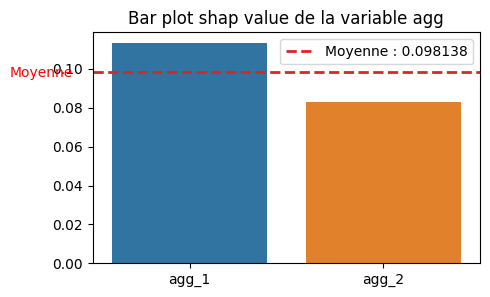

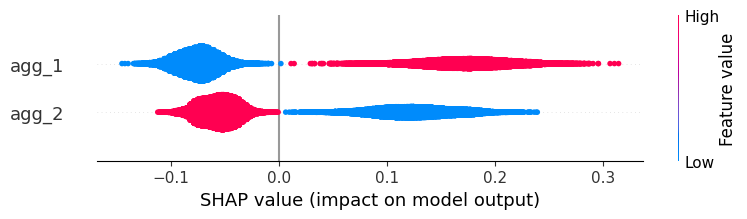

In [9]:
show_categoriel_bar_plot('agg',plot_size=(5,3))
feature_summary_plot("agg")


**Remarques:**
>* agg_1 = Hors agglomération et agg_2 = En agglomération
>* Selon le modèle, plus on est hors agglomération, plus le risque d'être tué/hospitalisé est élevé

### Importance de la feature **obsm** (Obstacle mobile heurté)

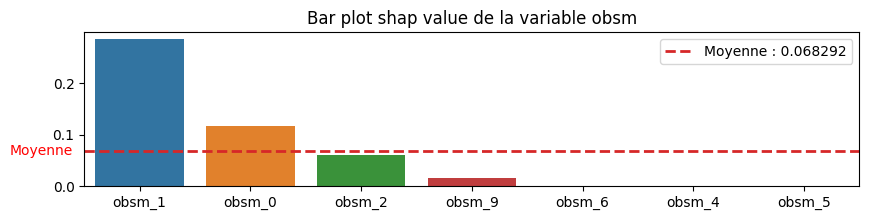

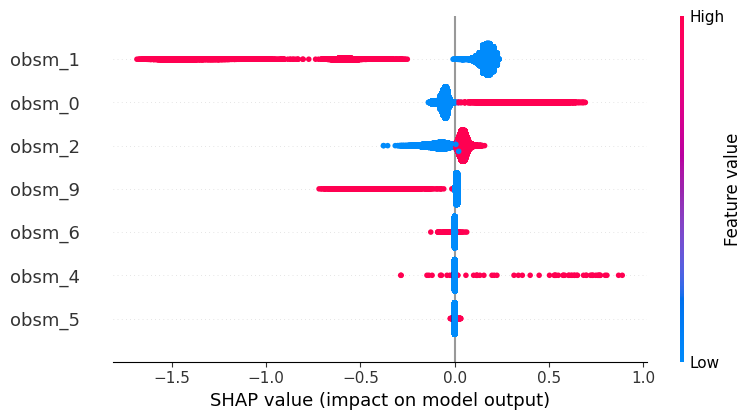

In [10]:
show_categoriel_bar_plot('obsm',plot_size=(10,2))
feature_summary_plot("obsm")

**Remarques:**
>* La catégorie obsm_1 (piéton) domine complètement les autres
>* Selon le modèle, si l'obstacle mobile est un piéton, le risque de se faire tuer est plus faible, de même si l'obstacle mobile n'est pas un véhicule.

### Importance de la feature **nbv** (Nombre de voie)

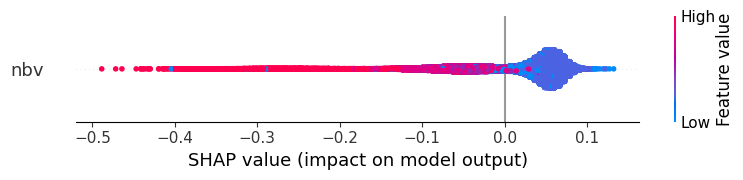

In [11]:
feature_summary_plot("nbv")

***Remarques:***
>* Selon le modèle plus le nombre de voie diminiue plus on risque de se faire tué/hospitalisé

### Importance de la feature **catu** (Catégorie d'usager)

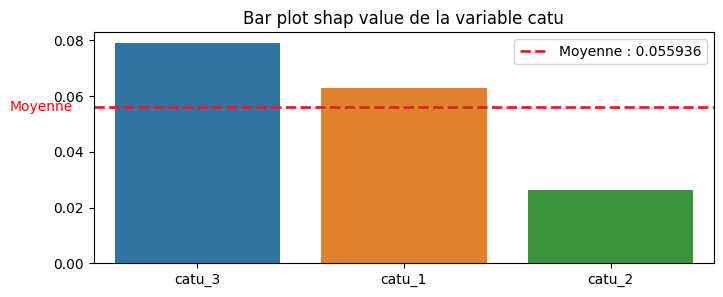

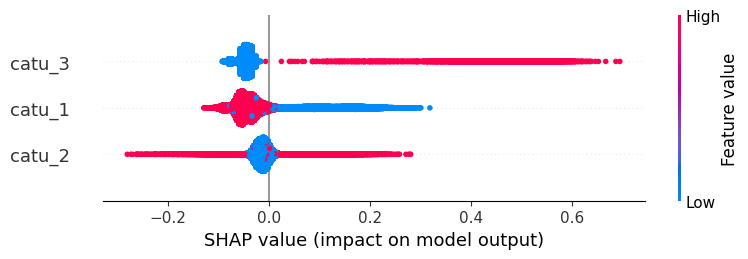

In [12]:
show_categoriel_bar_plot('catu',plot_size=(8,3))
feature_summary_plot("catu")

***Remarques:***
>* La catégorie 3 (Piéton) est la plus importante de la feature
>* Selon le modèle , le risque de se faire tué/hospitalisé est impotant si on est un piéton et inversement si on est un conductuer (catu_1)

### Importance de la feature **classe_age** (Classge d'age)

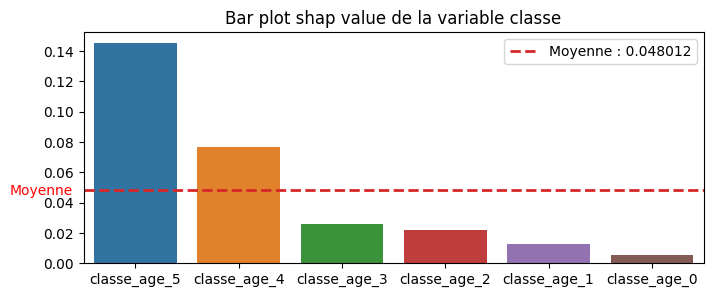

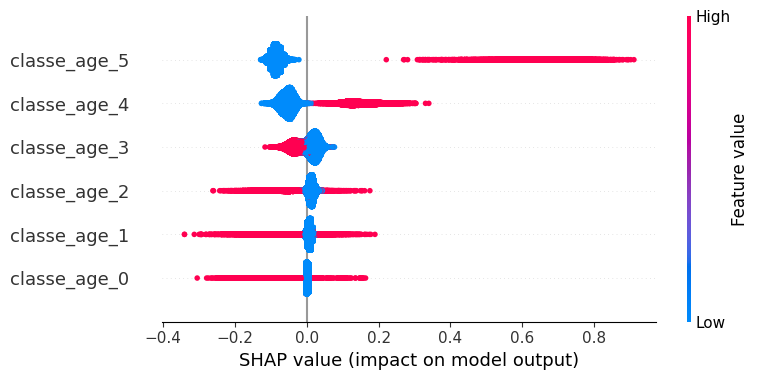

In [13]:
show_categoriel_bar_plot('classe',plot_size=(8,3))
feature_summary_plot("classe")

**Remarques:**
>* Les catégories 5 (+65 ans) et 4 (45-64 ans) sont dominantes dans la feature
>* Selon le modèle, les 45-65 ans et les +65 ans sont plus à risque de se faire tué/hospitalisé, contrairement à la classe d'âge 3 (25-44 ans)


### Importance de la feature **circ** (Régime de circulation)

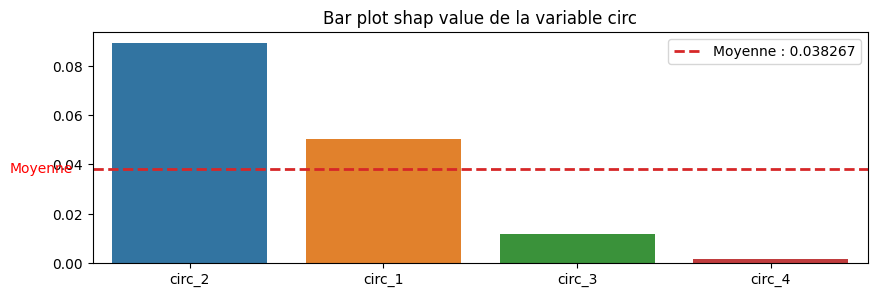

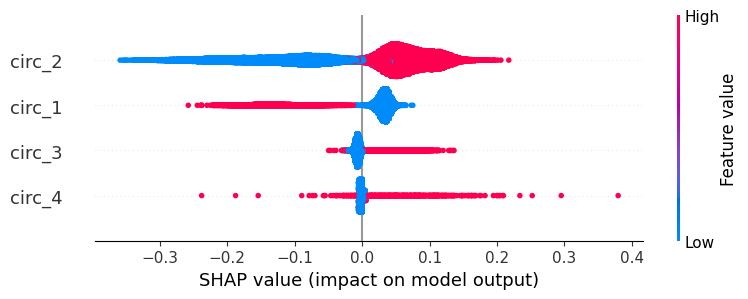

In [14]:
show_categoriel_bar_plot('circ',plot_size=(10,3))
feature_summary_plot("circ")

**Remarques:**
>* Les catégories circ_2 (sens bidirectionnel) et circ_1 (sens unique) sont dominantes dans la caractéristique.
>* Selon le modèle, le sens de circulation bidirectionnel (circ_2) prédit plus de décès/hospitalisation, contrairement au sens unique (circ_1).

### Importance de la feature **col** (Type de colision)

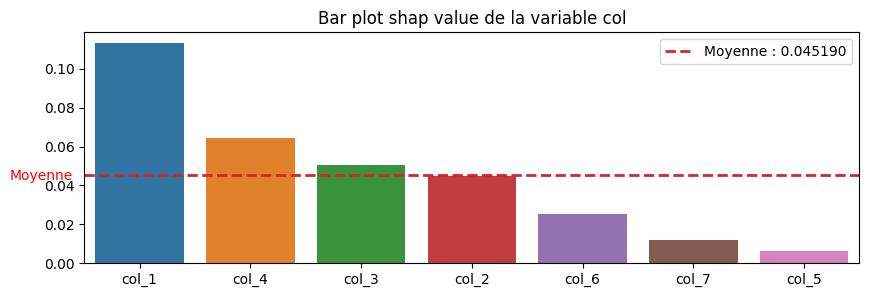

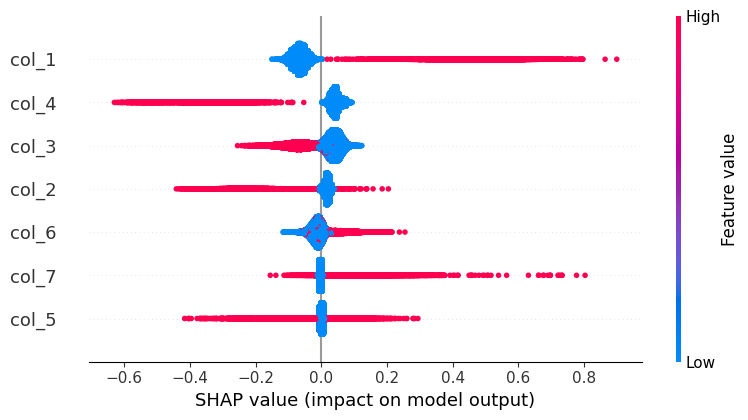

In [15]:
show_categoriel_bar_plot('col',plot_size=(10,3))
feature_summary_plot("col")

**Remarques:**
>* Les catégories col_1 ( deux véhicules frontales ) et col_4( Trois véhicules et plus en chaîne) sont dominants
>* Le modèle prédit que la colision de type frontale (col_1) ne fait que des tués/hospitalisés 
>* Le modèle prédit que  le risque de survit est plus élévée si la colision est de type deux véhicules par le coté (col_3) 